# Import

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import time
import seaborn as sns

# jupyter notebook full-width display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# pandas formatting
pd.set_option('display.float_format', '{:.3f}'.format)
# NOTE: underscore separaters ('_') are better than commas (',') because 
# numbers with underscores work in Python without any extra effort.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

# Data Sources

**The Billboard 100**

https://en.wikipedia.org/wiki/Billboard_Hot_100

https://www.kaggle.com/datasets/dhruvildave/billboard-the-hot-100-songs

**1.2M Songs with Metadata (csv)**

https://www.kaggle.com/datasets/rodolfofigueroa/spotify-12m-songs

**8+ M. Spotify Tracks, Genre, Audio Features (SQL)**

https://www.kaggle.com/datasets/maltegrosse/8-m-spotify-tracks-genre-audio-features


**Spotify API**

https://developer.spotify.com/documentation/web-api/

https://developer.spotify.com/console/get-search-item

https://developer.spotify.com/console/get-audio-features-track/

https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features

Spotipy Library:  https://spotipy.readthedocs.io/en/master/


# Data Description and Discussion

* The Billboard 100 data did not include audio features. It was combined with audio features from the following sources:
    * 1.2M Songs with Metadata (csv format)
    * 8+ M. Spotify Tracks, Genre, Audio Features (SQLite format)
    * Spotify API data gathered via the library Spotipy
* Overall, audio features was gathered for approximately 75% of songs from the Billboard 100.
    * Some songs were excluded based on data repetition issues
        * Typically this was only hard to find songs with very similar names
        * For example searching for 'Metallica The Unforgiven' and 'Metallica The Unforgiven Part 2' yielded the same Spotify id
            * It was determined that excluding these songs was less error-prone than manually fixing the issues
            * Alternatively, we could have kept 1 song. In this case, there is up to a 50% chance that the song is mislabelled, so this option appeared less favourable than dropping both repeat instances.
* A Quality Assurance (QA) check was performed on the final dataset.
    * Audio features from 100 songs were gathered from the Spotify API and compared to the datasets listed above.
    * There were 3 non-trivial issues noted in 2 of the 100 songs:
        * Madonna Live To Tell
            * A significant increase in loudness (~7 dB)
            * Appoximately 1 second different in length
            * All other audio features consistent between data sources
            * Both of these changes appear to result from remastering and re-uploading the track
                * https://artists.spotify.com/help/article/re-uploading-music
        * Lil Wayne Let It All Work Out
            * The key signature was not consistent between the 2 sources
            * The newer source (the API request from Sept 11, 2022) was correct (B major)
            * The SQL database was also different
            * My supposition is that these errors are due to the characteristics of the song:
                * atonal (most notably the sining)
                * detuned (bass pitch automation, and low-fi detuning effects)
    * Overall, there is a large degree of consistency between datasets. Furthermore, inconsistencies are all explainable with reasonable suppositions.

### Spotify API Audio Feature Descriptions
from: https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features

##### acousticness
number
\<float>

A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

    >= 0
    <= 1

##### analysis_url
string

A URL to access the full audio analysis of this track. An access token is required to access this data.

##### danceability
number
\<float>

Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

##### duration_ms
integer

The duration of the track in milliseconds.

##### energy
number
\<float>

Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

##### id
string

The Spotify ID for the track.

##### instrumentalness
number
\<float>

Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

##### key
integer
The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

    >= -1
    <= 11

##### liveness
number
\<float>

Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

##### loudness
number
\<float>

The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

##### mode
integer

Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

##### speechiness
number
\<float>

Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

##### tempo
number
\<float>

The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

##### time_signature
integer

An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".

    >= 3
    <= 7

##### track_href
string

A link to the Web API endpoint providing full details of the track.

##### type
string

The object type.

Allowed value:
"audio_features"

##### uri
string

The Spotify URI for the track.

##### valence
number
\<float>

A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

    >= 0
    <= 1

# Import Data
from: Kevin 820 Data Optimisation.ipynb

In [2]:
# all songs with audio features (combined from 3 sources)
df_10M = pd.read_parquet('df_10M.parquet')

# all Billboard 100 lists, audio features included where possible
df_B100 = pd.read_parquet('df_B100.parquet')

# all unique songs from the Billboard 100 lists, audio features included where possible
df_B100_songs = pd.read_parquet('df_B100_songs.parquet')

# all unique songs from the Billboard 100 lists, only songs with audio features included
df_B100_songs_AF = df_B100_songs.dropna().copy().reset_index(drop=True)

# Data Description

In [3]:
# sizes of the datasets
df_10M.shape, df_B100.shape, df_B100_songs.shape

((9595992, 16), (329930, 21), (29681, 16))

In [4]:
# data types
pd.concat(
    [df_10M.dtypes, df_B100.dtypes, df_B100_songs.dtypes], 
    keys=['df_10M.dtypes', 'df_B100.dtypes', 'df_B100_songs.dtypes'],
    axis=1
)

,df_10M.dtypes,df_B100.dtypes,df_B100_songs.dtypes
id,object,object,object
song,object,object,object
artist,object,object,object
acousticness,float32,float32,float32
danceability,float32,float32,float32
duration_ms,Int32,Int32,Int32
energy,float32,float32,float32
instrumentalness,float32,float32,float32
key,Int16,Int16,Int16
liveness,float32,float32,float32


In [5]:
# Date Range for Billboard Hot 100

df_B100.date.min(), df_B100.date.max()

(Timestamp('1958-08-04 00:00:00'), Timestamp('2021-11-06 00:00:00'))

In [6]:
df_B100[['rank', 'last-week', 'peak-rank', 'weeks-on-board']].describe().loc['mean':'max'].T

,mean,std,min,25%,50%,75%,max
rank,50.502,28.866,1.000,26.000,51.000,76.000,100.000
last-week,47.593,28.055,1.000,23.000,47.000,72.000,100.000
peak-rank,40.973,29.348,1.000,13.000,38.000,65.000,100.000
weeks-on-board,9.162,7.619,1.000,4.000,7.000,13.000,90.000


In [7]:
df_10M.describe().loc['mean':'max'].T

,mean,std,min,25%,50%,75%,max
acousticness,0.421,0.374,0.000,0.034,0.336,0.817,0.996
danceability,0.528,0.190,0.000,0.396,0.545,0.676,1.000
duration_ms,97.408,159341.591,0.000,169600.000,216933.000,275080.000,19672058.000
energy,0.545,0.282,0.000,0.310,0.567,0.789,1.000
instrumentalness,0.258,0.374,0.000,0.000,0.002,0.645,1.000
key,5.237,3.542,0.000,2.000,5.000,8.000,11.000
liveness,0.210,0.180,0.000,0.096,0.129,0.262,1.000
loudness,-10.967,6.318,-60.000,-13.675,-9.196,-6.398,7.234
mode,0.661,0.473,0.000,0.000,1.000,1.000,1.000
speechiness,0.098,0.135,0.000,0.036,0.047,0.082,0.974


In [8]:
df_B100.describe().loc['mean':'max'].T

,mean,std,min,25%,50%,75%,max
rank,50.502,28.866,1.000,26.000,51.000,76.000,100.000
last-week,47.593,28.055,1.000,23.000,47.000,72.000,100.000
peak-rank,40.973,29.348,1.000,13.000,38.000,65.000,100.000
weeks-on-board,9.162,7.619,1.000,4.000,7.000,13.000,90.000
acousticness,0.278,0.275,0.000,0.041,0.178,0.468,0.995
danceability,0.603,0.149,0.000,0.507,0.611,0.708,0.988
duration_ms,6410.969,66552.146,30213.000,183360.000,221306.000,258399.000,1561133.000
energy,0.625,0.199,0.007,0.479,0.643,0.786,0.999
instrumentalness,0.034,0.139,0.000,0.000,0.000,0.001,0.985
key,5.218,3.564,0.000,2.000,5.000,8.000,11.000


In [9]:
df_B100_songs.describe().loc['mean':'max'].T

,mean,std,min,25%,50%,75%,max
acousticness,0.316,0.290,0.000,0.052,0.224,0.556,0.995
danceability,0.590,0.152,0.000,0.491,0.598,0.697,0.988
duration_ms,24075.435,68403.261,30213.000,169533.000,210426.000,251333.000,1561133.000
energy,0.611,0.203,0.007,0.463,0.624,0.775,0.999
instrumentalness,0.039,0.151,0.000,0.000,0.000,0.001,0.985
key,5.196,3.556,0.000,2.000,5.000,8.000,11.000
liveness,0.197,0.168,0.012,0.091,0.132,0.255,0.999
loudness,-8.927,3.622,-30.346,-11.314,-8.554,-6.111,2.291
mode,0.741,0.438,0.000,0.000,1.000,1.000,1.000
speechiness,0.067,0.076,0.000,0.032,0.040,0.061,0.951


**Proportion of Songs With Audio Feature Data:**

~75% of songs on the Billboard list are available on Spotify, and weren't removed for data errors

In [10]:
# All Billboard 100 lists
# number not null, total, proportion not null
(
    df_B100[df_B100.id.notnull()].shape[0], 
    df_B100.shape[0], 
    df_B100[df_B100.id.notnull()].shape[0] / df_B100.shape[0]
)

(253254, 329930, 0.7675991877064832)

In [11]:
# All songs from Billboard 100 lists
# number not null, total, proportion not null
(
    df_B100_songs[df_B100_songs.id.notnull()].shape[0], 
    df_B100_songs.shape[0], 
    df_B100_songs[df_B100_songs.id.notnull()].shape[0] / df_B100_songs.shape[0]
)

(22189, 29681, 0.7475826286176341)

In [12]:
df_B100_songs_AF.columns

Index(['id', 'song', 'artist', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

# Exploratory Data Analysis

### Histograms

In [13]:
# main features
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 
            'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

def compare_histograms(feature, bins=50, logy=False, figsize=(16, 6)):

    plt.figure(figsize=figsize)
    plt.hist(df_B100_songs_AF[feature], bins, alpha=0.5, label='Hot 100 Songs', density=True)
    plt.hist(df_10M[feature], bins, alpha=0.5, label='All Songs', density=True)

    plt.title(feature.title() + ' Histogram')
    plt.xlabel(feature.title())
    plt.legend(loc='upper right')
    if logy:
        plt.yscale('log')
        plt.ylabel('Log Relative Frequency')
    else:
        plt.ylabel('Relative Frequency')


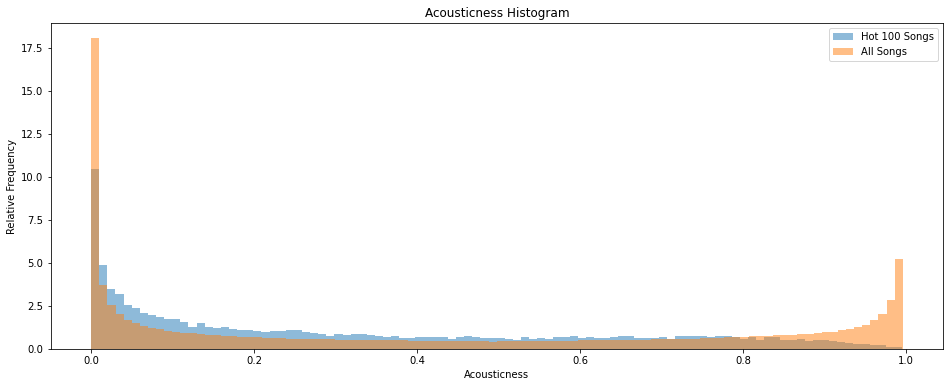

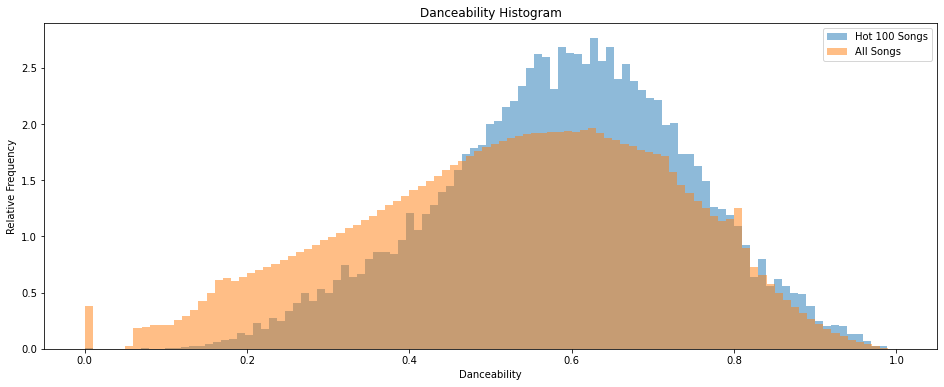

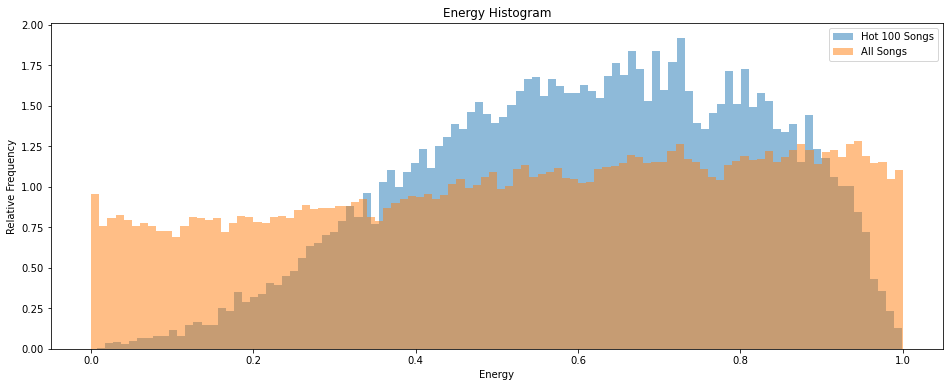

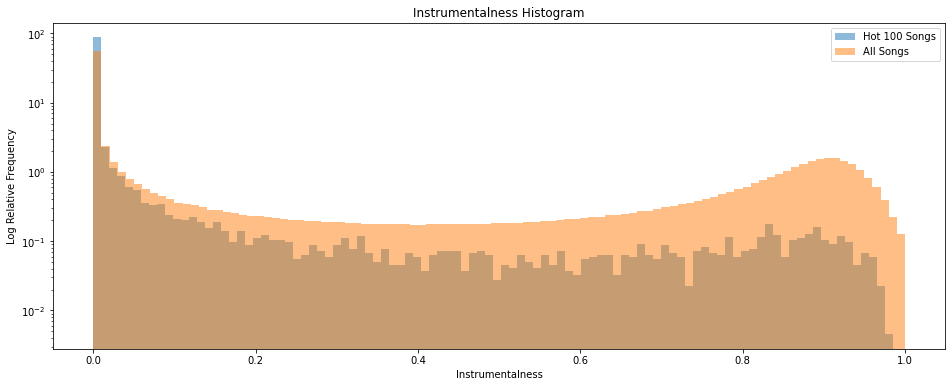

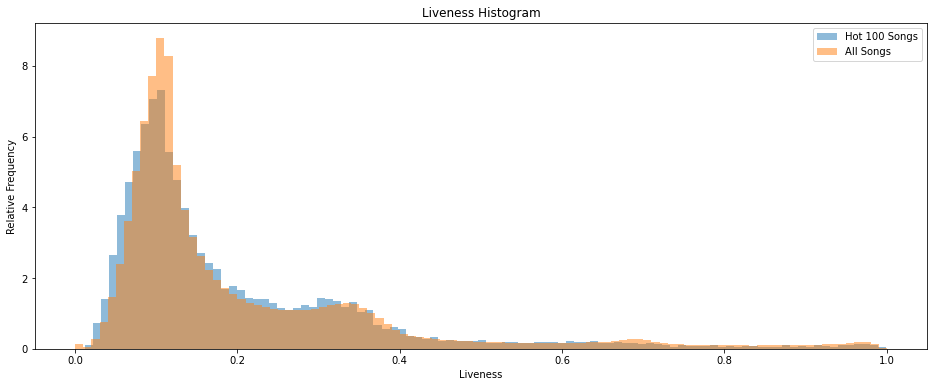

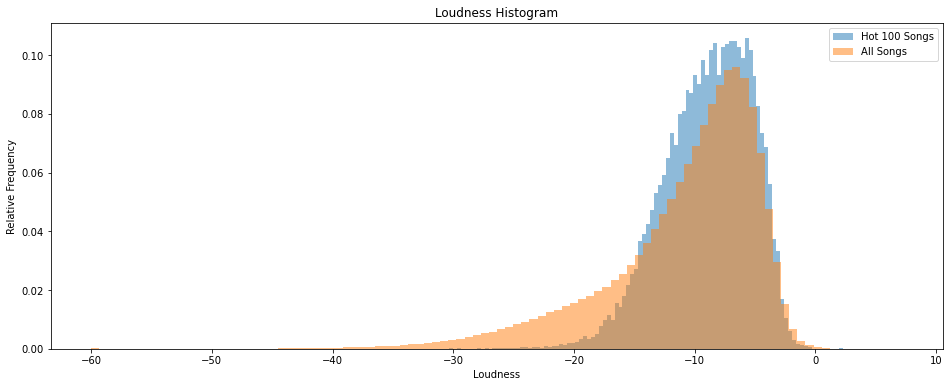

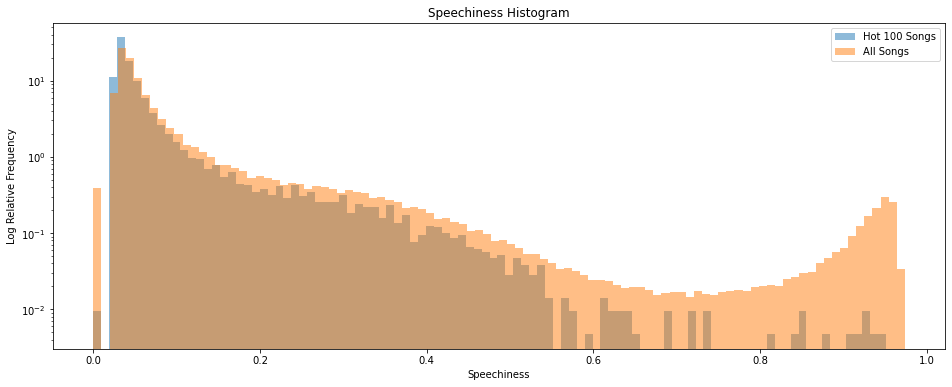

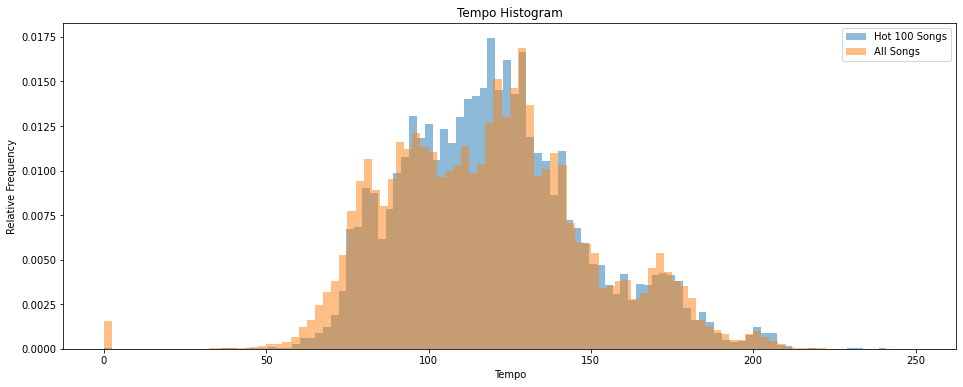

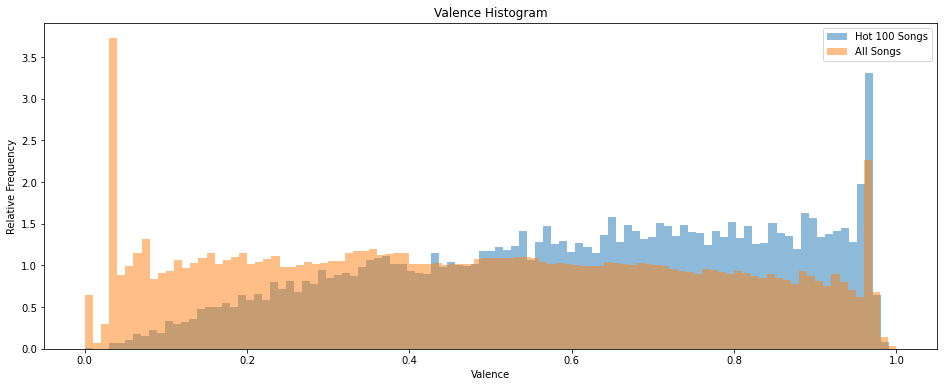

In [14]:
# Histograms of Features
for feature in features:
    compare_histograms(feature, 100, logy=(feature in ['duration_ms', 'instrumentalness', 'speechiness']))

In [15]:
# features requiring specific bin sizes
other_features = ['key', 'mode', 'time_signature']

# Histograms of Features with Specific Bin Sizes
other_bins = {'key': 12, 'mode': 2, 'time_signature': 5}

def compare_histograms_discrete(feature, bins=50, logy=False, figsize=(16, 6)):

    fig, ax = plt.subplots(figsize=figsize)
    
    # use range(bins+1) to offset tick labels and line up with appropriate labels
    plt.hist(df_B100_songs_AF[feature], [x for x in range(bins+1)], alpha=0.5, label='Hot 100 Songs', density=True, align='left')
    plt.hist(df_10M[feature], [x for x in range(bins+1)], alpha=0.5, label='All Songs', density=True, align='left')

    plt.title(feature.title() + ' Histogram')
    plt.xlabel(feature.title())
    plt.legend(loc='upper right')
    if logy:
        plt.yscale('log')
        plt.ylabel('Log Relative Frequency')
    else:
        plt.ylabel('Relative Frequency')
    
    ax.set(xticks=[x for x in range(bins)])


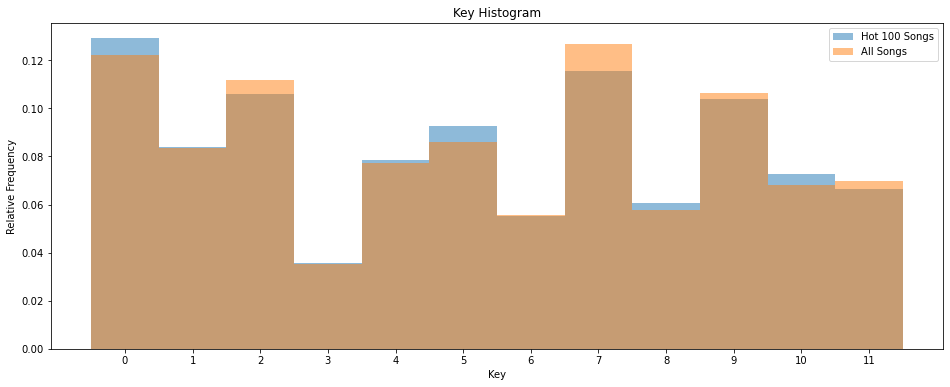

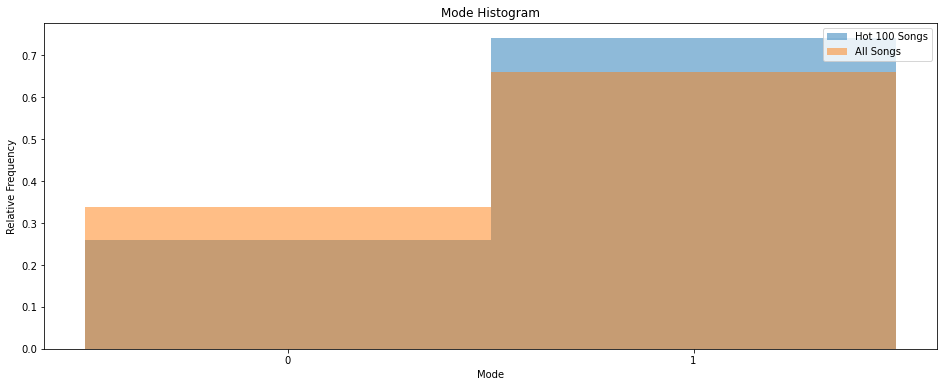

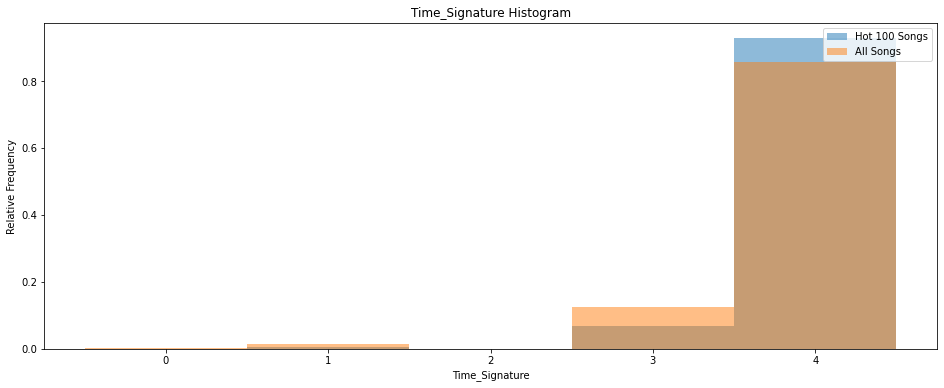

In [16]:
# Histograms of Features with Specific Bin Sizes

# Histograms of Features
for feature in other_features:
    compare_histograms_discrete(feature, other_bins[feature])

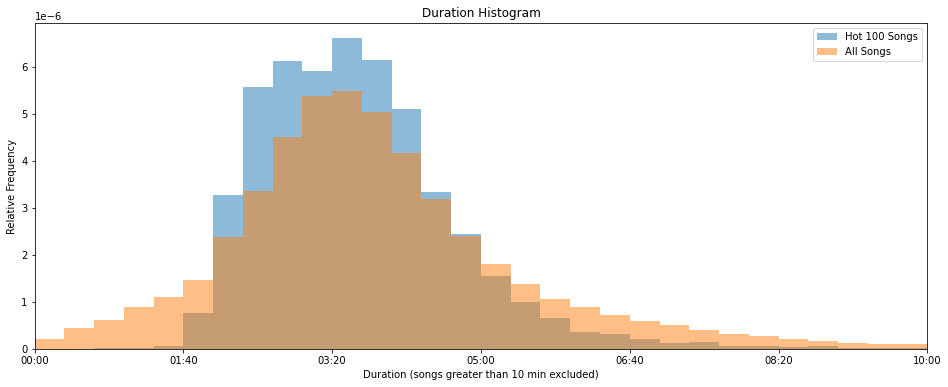

In [17]:
# duration_ms needs to share the x-axis

fig, ax = plt.subplots(figsize=(16, 6))

bins = 1000
maxx = df_10M['duration_ms'].max()
maxx = round(maxx, ndigits=-7)
increment = maxx / bins  # need to do this first or get integer wrap around error
bins = [x for x in range(bins) * increment] 

plt.hist(df_B100_songs_AF['duration_ms'], bins, alpha=0.5, label='Hot 100 Songs', density=True)
plt.hist(df_10M['duration_ms'], bins, alpha=0.5, label='All Songs', density=True)

plt.title('Duration Histogram')
plt.xlabel('Duration (songs greater than 10 min excluded)')
plt.legend(loc='upper right')
plt.ylabel('Relative Frequency')
ax.set_xlim((0, 600000))

# https://stackoverflow.com/questions/40395227/minute-and-second-format-for-x-label-of-matplotlib
formatter = mpl.ticker.FuncFormatter(lambda ms, x: time.strftime('%M:%S', time.gmtime(ms // 1000)))
ax.xaxis.set_major_formatter(formatter)

plt.show(feature.title())